In [1]:
#Context:

#Source: https://catalog.data.gov/dataset/real-estate-sales-2001-2018

#Real Estate Sales 2001-2021 GL

#The Office of Policy and Management maintains a listing of all real estate sales with a sales price of $2,000 
#or greater that occur between October 1 and September 30 of each year. For each sale record, 
#the file includes: town, property address, date of sale, property type (residential, apartment, commercial, industrial or vacant land),
#sales price, and property assessment.

#Data are collected in accordance with Connecticut General Statutes, section 10-261a and 10-261b: 
#https://www.cga.ct.gov/current/pub/chap_172.htm#sec_10-261a and https://www.cga.ct.gov/current/pub/chap_172.htm#sec_10-261b.
#Annual real estate sales are reported by grand list year (October 1 through September 30 each year). 
#For instance, sales from 2018 GL are from 10/01/2018 through 9/30/2019.

In [2]:
#Libraries
import pandas as pd
import numpy as np

In [3]:
#Reading CVS file
#Adding the decimal parameter to avoid scientific notation
df=pd.read_csv('Real_Estate_Sales_2001-2021_GL.csv', decimal=',', low_memory=False)
df

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.463,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,10/02/2020,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.5883,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,07/05/2022,Avon,53 COTSWOLD WAY,329730.00,805000.00,0.4096,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,03/09/2021,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.7248,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,04/13/2021,Avon,111 NORTHINGTON DRIVE,619290.00,890000.00,0.6958,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,190272,2019,06/24/2020,New London,4 BISHOP CT,60410.00,53100.00,1.137664783,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1054155,190284,2019,11/27/2019,Waterbury,126 PERKINS AVE,68280.00,76000.00,0.8984,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1054156,190129,2019,04/27/2020,Windsor Locks,19 HATHAWAY ST,121450.00,210000.00,0.5783,Single Family,Single Family,NaN,NaN,NaN,NaN
1054157,190504,2019,06/03/2020,Middletown,8 BYSTREK DR,203360.00,280000.00,0.7263,Single Family,Single Family,NaN,NaN,NaN,NaN


In [4]:
#Checking the data type as it comes out.
#...
#As we can see there are a few format data that we need to 
#fix before start analizing the data. For example: Date Recorded need to be date type instead of object type... etc.
df.dtypes

Serial Number        int64
List Year            int64
Date Recorded       object
Town                object
Address             object
Assessed Value      object
Sale Amount         object
Sales Ratio         object
Property Type       object
Residential Type    object
Non Use Code        object
Assessor Remarks    object
OPM remarks         object
Location            object
dtype: object

In [5]:
#Changing data type
#Since Object data type is a text or mixed numeric and non-numeric values we do not change this for now.
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'])

In [6]:
df.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value              object
Sale Amount                 object
Sales Ratio                 object
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object

In [7]:
#Assessed Value, Sale Amount and Sales Ratio are object type meaning they have strings values on it. Let's fix that.
df['Assessed Value'] = pd.to_numeric(df['Assessed Value'], errors='coerce').fillna(0)
df['Sales Ratio'] = pd.to_numeric(df['Sales Ratio'], errors='coerce').fillna(0)
df['Sale Amount'] = df['Sale Amount'].astype(float).round(2)
df.sort_values(by="Sale Amount", ascending=False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
63734,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.0,5.000000e+09,0.000448,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN
882165,160390,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790.0,3.955000e+08,0.027651,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
858903,160389,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090.0,3.955000e+08,0.027381,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,POINT (-73.53597 41.0442)
892177,160386,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510.0,3.955000e+08,0.141958,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,POINT (-73.53568 41.04536)
856585,160393,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110.0,3.955000e+08,0.128496,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254850,30548,2003,2004-01-21,Hartford,134-136 PARK TER,34440.0,0.000000e+00,0.000000,NaN,NaN,13,NaN,NaN,NaN
252793,20194,2002,2003-07-30,Weston,6-10 MICHAEL'S WAY,0.0,0.000000e+00,0.000000,NaN,NaN,16,NaN,NaN,NaN
309623,49887,2004,2005-08-16,Easton,11 STURBRIDGE RD,0.0,0.000000e+00,0.000000,NaN,NaN,29,NaN,NaN,NaN
180999,10262,2001,2001-11-20,Stratford,115 SUMMER ST,112690.0,0.000000e+00,0.000000,NaN,NaN,1,NaN,NaN,NaN


In [8]:
df.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object

In [9]:
#We change the data type but now we need to change the scientific notation to a standard float representation. 
pd.options.display.float_format = '{:.2f}'.format
df.sort_values(by="Sale Amount", ascending=False)

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
63734,20200091,2020,2021-08-19,Willington,456 TOLLAND TPKE,2238530.00,5000000000.00,0.00,Apartments,NaN,25 - Other,APARTMENTS-COMMERICAL,INCORRECT SALE PRICE,NaN
882165,160390,2016,2016-12-06,Stamford,200 HENRY STREET # 4,10935790.00,395500000.00,0.03,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
858903,160389,2016,2016-12-06,Stamford,200 HENRY STREET # 3,10829090.00,395500000.00,0.03,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,POINT (-73.53597 41.0442)
892177,160386,2016,2016-12-06,Stamford,120 TOWNE STREET,56144510.00,395500000.00,0.14,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,POINT (-73.53568 41.04536)
856585,160393,2016,2016-12-06,Stamford,115 TOWNE STREET,50820110.00,395500000.00,0.13,NaN,NaN,25 - Other,ENTERPRISE ZONE & MULTIPLE PARCEL SALE,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254850,30548,2003,2004-01-21,Hartford,134-136 PARK TER,34440.00,0.00,0.00,NaN,NaN,13,NaN,NaN,NaN
252793,20194,2002,2003-07-30,Weston,6-10 MICHAEL'S WAY,0.00,0.00,0.00,NaN,NaN,16,NaN,NaN,NaN
309623,49887,2004,2005-08-16,Easton,11 STURBRIDGE RD,0.00,0.00,0.00,NaN,NaN,29,NaN,NaN,NaN
180999,10262,2001,2001-11-20,Stratford,115 SUMMER ST,112690.00,0.00,0.00,NaN,NaN,1,NaN,NaN,NaN


In [10]:
df.dtypes

Serial Number                int64
List Year                    int64
Date Recorded       datetime64[ns]
Town                        object
Address                     object
Assessed Value             float64
Sale Amount                float64
Sales Ratio                float64
Property Type               object
Residential Type            object
Non Use Code                object
Assessor Remarks            object
OPM remarks                 object
Location                    object
dtype: object

In [11]:
#Let's check that in the Serial Number column, there is no row with a 0 value.
#You can not have a sell attached to a non Serial Number Value. The company needs to check it, This could mean embezzlement of funds.
dsn = df[df["Serial Number"] == 0]
dsn

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
236356,0,2002,NaT,Orange,NaN,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
len(df)

1054159

In [13]:
#Since we found a suspicious record, we are going to remove it from our database for the moment until its veracity is verified.
dp = df.drop(df[df["Serial Number"] == 0].index)
len(dp)

1054158

In [14]:
#We need to remove the sales that have 0 as value since we are going to be counting them.
dp_1 = dp.drop(dp[dp["Sale Amount"] == 0].index)
dp_1

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,NaN,NaN,NaN,NaN,NaN
1,20002,2020,2020-10-02,Ashford,390 TURNPIKE RD,253000.00,430000.00,0.59,Residential,Single Family,NaN,NaN,NaN,NaN
2,210317,2021,2022-07-05,Avon,53 COTSWOLD WAY,329730.00,805000.00,0.41,Residential,Single Family,NaN,NaN,NaN,POINT (-72.846365959 41.781677018)
3,200212,2020,2021-03-09,Avon,5 CHESTNUT DRIVE,130400.00,179900.00,0.72,Residential,Condo,NaN,NaN,NaN,NaN
4,200243,2020,2021-04-13,Avon,111 NORTHINGTON DRIVE,619290.00,890000.00,0.70,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054154,190272,2019,2020-06-24,New London,4 BISHOP CT,60410.00,53100.00,1.14,Single Family,Single Family,14 - Foreclosure,NaN,NaN,NaN
1054155,190284,2019,2019-11-27,Waterbury,126 PERKINS AVE,68280.00,76000.00,0.90,Single Family,Single Family,25 - Other,PRIVATE SALE,NaN,NaN
1054156,190129,2019,2020-04-27,Windsor Locks,19 HATHAWAY ST,121450.00,210000.00,0.58,Single Family,Single Family,NaN,NaN,NaN,NaN
1054157,190504,2019,2020-06-03,Middletown,8 BYSTREK DR,203360.00,280000.00,0.73,Single Family,Single Family,NaN,NaN,NaN,NaN


In [15]:
#Now, Let's check: How many sales were made per year?
#These metrics are essential to identify whether the company increases or decreases its sales each year in comparison with years before.
df1 = dp_1.groupby(['List Year'])['Sale Amount'].agg('count').reset_index()
df1

,List Year,Sale Amount
0,2001,59080
1,2002,59430
2,2003,64051
3,2004,83486
4,2005,61438
5,2006,48770
6,2007,35614
7,2008,32735
8,2009,42508
9,2010,33491


In [16]:
#Which years had the most amount of sales?
df1_r = df1.sort_values(by="Sale Amount", ascending=False)
#Rename the column
df1_1 = df1_r.rename(columns={"Sale Amount": "Sale Amount Count"})
df1_1

,List Year,Sale Amount Count
3,2004,83486
19,2020,66592
2,2003,64051
4,2005,61438
1,2002,59430
0,2001,59080
18,2019,58954
20,2021,56946
17,2018,50674
15,2016,49773


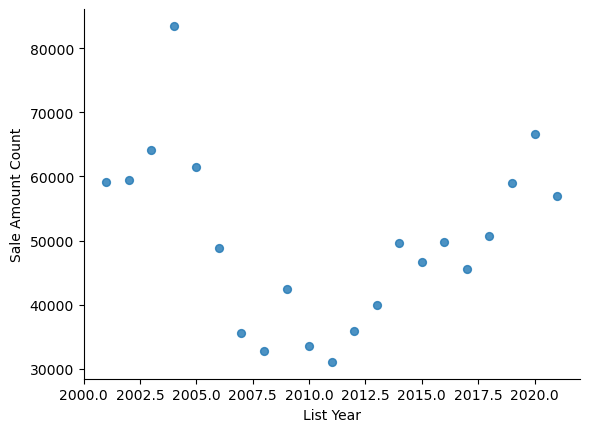

In [17]:
from matplotlib import pyplot as plt
df1_1.plot(kind='scatter', x='List Year', y='Sale Amount Count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
#That result by its own does not show a lot of infomation. Let's see which year it sold the most.
df1_2 = dp_1.groupby(['List Year'])['Sale Amount'].agg('sum').reset_index()
df1_3 = df1_2.sort_values(by="Sale Amount", ascending=True)
df1_3

,List Year,Sale Amount
7,2008,10666103724.00
9,2010,11107540414.00
10,2011,12167673424.00
11,2012,14226518439.22
0,2001,14671668335.00
8,2009,15100980907.00
6,2007,15518803446.00
14,2015,16135823472.00
12,2013,16517079160.00
1,2002,17687185857.00


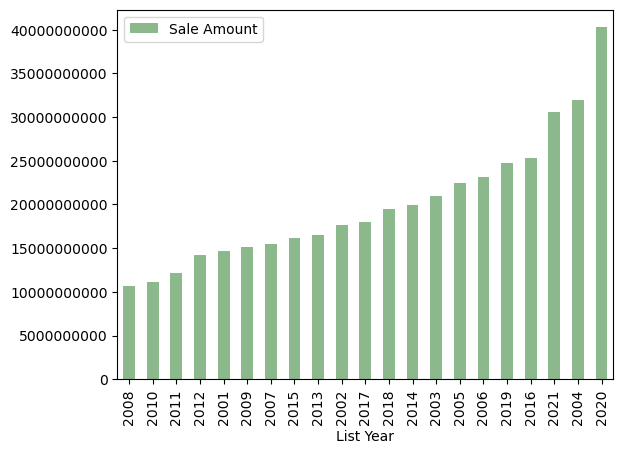

In [19]:
#Now the client knows that on 2020 was the best year.
ax = df1_3.plot.bar(x='List Year', y='Sale Amount', color = 'darkgreen', alpha = 0.45)
ax.ticklabel_format(style='plain', axis='y') # prevents scientific notation

In [20]:
#But wait, the client would like to see it by Town
df1_4 = dp_1.groupby(['List Year', 'Town'])['Sale Amount'].agg('sum').reset_index()
df1_5 = df1_4.sort_values(by="Town", ascending=True)
df1_5.head(10)

,List Year,Town,Sale Amount
815,2007,***Unknown***,282450.00
1784,2014,Andover,8490387.00
257,2003,Andover,11592182.00
392,2004,Andover,18978162.00
2644,2020,Andover,19992538.00
546,2005,Andover,14220375.00
2486,2019,Andover,13445256.00
816,2007,Andover,10372230.00
945,2008,Andover,7337780.00
1076,2009,Andover,8853286.00


In [21]:
dp_1[dp_1["Town"] == "***Unknown***"]

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
501603,70086,2007,2007-12-18,***Unknown***,18 MATHIEU LANE,66540.00,282450.00,0.24,Single Family,Single Family,07 - Change in Property,NaN,NaN,NaN


In [22]:
len(dp_1)

1052349

In [23]:
#After seeing the previous result the client have found that a Single Family property 
#is under "***Unknown***" Town, this record needs to be verify.
#Let's remove it from our dataset.
df1_6 = dp_1.drop(dp_1[dp_1["Town"] == "***Unknown***"].index)
len(df1_6)

1052348

In [24]:
#but stakeholders think that these result are not easy to digest, for that they will like to see it 
#as the sales volume of homes sold in the last three months September, October and November 2021.
#This metrics can help to assess demand and market activity
#Let's take out the year and month from date recorded column 
df1_6['Year'] = df1_6['Date Recorded'].dt.year
df1_6['Month'] = df1_6['Date Recorded'].dt.month

In [25]:
#Now let's create a dataset that only have records from September, October and November 2021.
df1_7 = df1_6[(df1_6['Year'] == 2021) & ((df1_6['Month'] == 9) | (df1_6['Month'] == 10) | (df1_6['Month'] == 11))]
df1_7

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,Year,Month
0,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.00,325000.00,0.46,Commercial,NaN,NaN,NaN,NaN,NaN,2021,9
14,2000381,2020,2021-09-13,Bloomfield,9 SADDLE RIDGE,163730.00,250000.00,0.65,Residential,Condo,NaN,NaN,NaN,NaN,2021,9
16,210035,2021,2021-10-20,Branford,25 QUARRY DOCK RD,208100.00,448000.00,0.46,Residential,Condo,NaN,NaN,NaN,POINT (-72.815906039 41.268214998),2021,10
18,200804,2020,2021-09-28,Branford,119 MONTOWESE ST,455100.00,650000.00,0.70,Commercial,NaN,NaN,NaN,NaN,NaN,2021,9
19,201295,2020,2021-09-09,Bristol,609 CAMP ST,144340.00,249900.00,0.58,Residential,Single Family,NaN,NaN,NaN,NaN,2021,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123856,210033,2021,2021-10-08,West Haven,31 HOWARD ST,178570.00,350000.00,0.51,Residential,Single Family,NaN,NaN,NaN,POINT (-72.973529991 41.244308008),2021,10
123879,210021,2021,2021-10-06,West Haven,98 MOHAWK DR,137900.00,315000.00,0.44,Residential,Single Family,NaN,NaN,NaN,POINT (-72.978781002 41.246323982),2021,10
123882,2100031,2021,2021-10-19,Wethersfield,46 COL CHESTER DR,349490.00,450000.00,0.78,Residential,Single Family,NaN,NaN,NaN,POINT (-72.688137001 41.70219801),2021,10
123883,210210,2021,2021-11-15,West Hartford,24 COTTAGE ROAD,191240.00,270000.00,0.71,Residential,Single Family,NaN,NaN,NaN,POINT (-72.740005978 41.738864017),2021,11


In [26]:
df1_8 = df1_7.groupby(['Year', 'Month'])['Sale Amount'].agg('sum').reset_index()
df1_8

,Year,Month,Sale Amount
0,2021,9,2745595303.72
1,2021,10,2773167633.00
2,2021,11,2584360514.41


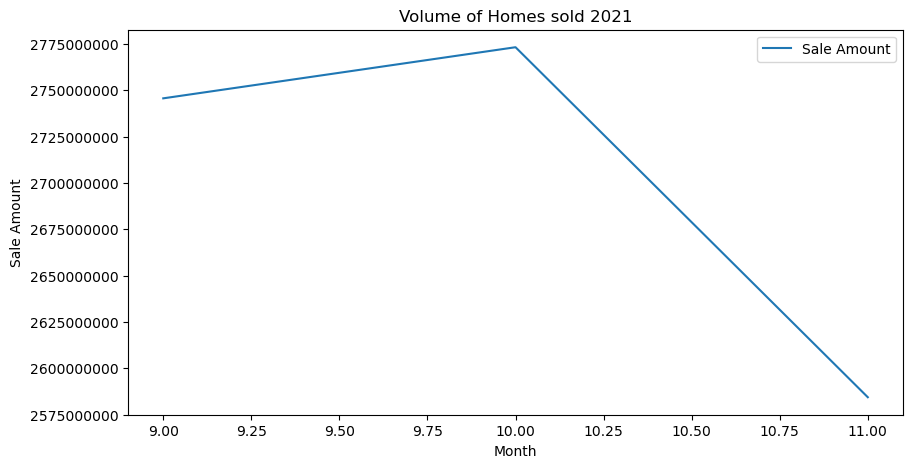

In [27]:
ax = df1_8.plot(y='Sale Amount',x='Month', figsize=(10,5), title='Volume of Homes sold 2021', ylabel='Sale Amount')
ax.ticklabel_format(style='plain', axis='y')